In [76]:
import pandas as pd 
from sklearn.feature_selection import VarianceThreshold
import sknetwork

## Data loading (Simple dataset)
We will load all needed dataset in our program.

In [88]:
# load datasets
users_features = pd.read_csv("data/Social_spammers_dataset/users_features/features.csv")
labels = pd.read_csv("data/Social_spammers_dataset/users/coded_ids_labels_train.csv")
code_ids_label = pd.read_csv("data/Social_spammers_dataset/users/coded_ids.csv")
test_submission = pd.read_csv("data/Social_spammers_dataset/users/coded_ids_labels_test.csv")
users_features = pd.merge(users_features, code_ids_label, on='user_id')

In [78]:
users_features_with_labels = pd.merge(users_features, labels, on='coded_id')

In [80]:
users_features.head()

,active_tweeting_frequency_per_day,adjusted_nb_of_uses_of_hashtag,adjusted_nb_of_uses_of_mention,adjusted_nb_of_uses_of_sources,adjusted_nb_of_uses_of_url,age,avg_intertweet_times,avg_intertweet_times_seconds,content_duration_days,date_newest_tweet,...,time_since_newest_tweet_months,time_zone,tweeting_frequency_per_day,tweets_with_at_top_20,tweets_with_hashtags_top_20,tweets_with_urls_top_20,urls_used_on_average,user_id,utc_offset,coded_id
0,0.055,2.600,5.308,21.087,2.333,2186,19 days 05:12:37.409091000,1660357.0,422,26/12/2017 14:45:25,...,1.533333,Hawaii,5.396,10,5,5,2.000,494199648,-36000.0,203
1,154.333,3.447,13.164,463.000,1.045,1286,0 days 00:10:33.400433000,633.0,3,27/12/2014 22:46:34,...,38.033333,NaN,11.567,13,6,1,1.023,2708449765,NaN,112
2,40.000,9.938,8.329,400.000,1.000,2474,0 days 00:39:20.897243000,2361.0,10,10/02/2018 17:00:37,...,0.000000,Riyadh,35.167,19,2,1,1.000,293270197,10800.0,138
3,0.334,2.600,2.412,55.284,36.885,3220,16 days 16:04:30.509317000,1440271.0,485,04/07/2011 03:37:09,...,80.466667,Pacific Time (US & Canada),0.051,0,0,20,2.400,33046208,-28800.0,148
4,4.494,0.000,0.000,203.380,1.000,816,0 days 05:24:08.857143000,19449.0,89,09/02/2018 12:43:09,...,0.033333,Pacific Time (US & Canada),23.863,0,0,20,1.000,4217668515,-28800.0,182


In [81]:
labels.head()

,coded_id,label
0,1,1
1,2,0
2,3,0
3,4,1
4,6,0


In [84]:
code_ids_label.head()

,coded_id,user_id
0,1,100338945
1,2,1084425186
2,3,1110273865
3,4,1132049448
4,5,1145742354


In [83]:
users_features.head()

,active_tweeting_frequency_per_day,adjusted_nb_of_uses_of_hashtag,adjusted_nb_of_uses_of_mention,adjusted_nb_of_uses_of_sources,adjusted_nb_of_uses_of_url,age,avg_intertweet_times,avg_intertweet_times_seconds,content_duration_days,date_newest_tweet,...,time_since_newest_tweet_months,time_zone,tweeting_frequency_per_day,tweets_with_at_top_20,tweets_with_hashtags_top_20,tweets_with_urls_top_20,urls_used_on_average,user_id,utc_offset,coded_id
0,0.055,2.600,5.308,21.087,2.333,2186,19 days 05:12:37.409091000,1660357.0,422,26/12/2017 14:45:25,...,1.533333,Hawaii,5.396,10,5,5,2.000,494199648,-36000.0,203
1,154.333,3.447,13.164,463.000,1.045,1286,0 days 00:10:33.400433000,633.0,3,27/12/2014 22:46:34,...,38.033333,NaN,11.567,13,6,1,1.023,2708449765,NaN,112
2,40.000,9.938,8.329,400.000,1.000,2474,0 days 00:39:20.897243000,2361.0,10,10/02/2018 17:00:37,...,0.000000,Riyadh,35.167,19,2,1,1.000,293270197,10800.0,138
3,0.334,2.600,2.412,55.284,36.885,3220,16 days 16:04:30.509317000,1440271.0,485,04/07/2011 03:37:09,...,80.466667,Pacific Time (US & Canada),0.051,0,0,20,2.400,33046208,-28800.0,148
4,4.494,0.000,0.000,203.380,1.000,816,0 days 05:24:08.857143000,19449.0,89,09/02/2018 12:43:09,...,0.033333,Pacific Time (US & Canada),23.863,0,0,20,1.000,4217668515,-28800.0,182


In [87]:
test_submission.head()

,coded_id,label
0,5,NaN
1,26,NaN
2,37,NaN
3,40,NaN
4,52,NaN


## Data Loading (Graph dataset)

In [22]:
graph = pd.read_csv("./data/Social_spammers_dataset/graphs/c_combined_edges_w_1_s_0.9.csv")

## Data preprocessing

In [89]:
users_features_with_labels.shape

(686, 147)

In [90]:
users_features_with_labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686 entries, 0 to 685
Columns: 147 entries, active_tweeting_frequency_per_day to label
dtypes: bool(2), float64(93), int64(44), object(8)
memory usage: 783.8+ KB


In [91]:
# total null values
users_features_with_labels.isna().sum().sum()

1022

In [92]:
users_features_with_labels['label'].isna().sum()

0

In [93]:
#all columns with null values
users_features_with_labels.isna().sum()


active_tweeting_frequency_per_day      0
adjusted_nb_of_uses_of_hashtag         0
adjusted_nb_of_uses_of_mention         0
adjusted_nb_of_uses_of_sources         0
adjusted_nb_of_uses_of_url             0
                                    ... 
urls_used_on_average                   0
user_id                                0
utc_offset                           168
coded_id                               0
label                                  0
Length: 147, dtype: int64

In [94]:
# column content null values
df1 = users_features_with_labels.iloc[0:0,]
columns = list(df1)
xx=[]
yy=[]
for col in columns :
    s = users_features_with_labels[col].isna().sum()
    if (s != 0):
        print (col)
        xx.append(col)
        print(s)
        yy.append(s)
    else:
        pass
users_features_with_labels.shape

spam_in_screen_name
686
time_zone
168
utc_offset
168


(686, 147)

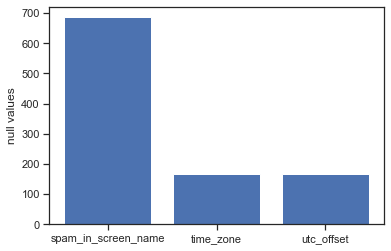

<Figure size 432x288 with 0 Axes>

In [96]:
# values null in columns
import matplotlib.pyplot as plt
plt.bar(xx,yy,align='center') # A bar chart
#plt.xlabel('percentage')
plt.ylabel('null values')
#for i in range(len(y)):
#    plt.hlines(y[i],0,x[i]) # Here you are drawing the horizontal lines
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("null_values.png", dpi=100)

In [100]:

users_features_with_labels[['time_zone','utc_offset']].head(14)

,time_zone,utc_offset
0,Hawaii,-36000.0
1,Riyadh,10800.0
2,Pacific Time (US & Canada),-28800.0
3,Pacific Time (US & Canada),-28800.0
4,Central Time (US & Canada),-21600.0
5,Pacific Time (US & Canada),-28800.0
6,Riyadh,10800.0
7,NaN,NaN
8,NaN,NaN
9,Riyadh,10800.0


In [102]:
#Frequent Category Imputation
#This technique is used to fill the missing values in categorical data. 
#In this, we replace NaN values with the most Frequent label. 
#First, we find the most frequent label and then replace NaN with it.

def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0] ##Most Frequent
    df[variable].fillna(most_frequent_category,inplace=True) 
for feature in ['time_zone']:           ##List of Categorical Features
    impute_nan(users_features_with_labels,feature)

for feature in ['utc_offset']:           ##List of Categorical Features
    impute_nan(users_features_with_labels,feature)

users_features_with_labels[['time_zone','utc_offset']].head(14)

,time_zone,utc_offset
0,Hawaii,-36000.0
1,Riyadh,10800.0
2,Pacific Time (US & Canada),-28800.0
3,Pacific Time (US & Canada),-28800.0
4,Central Time (US & Canada),-21600.0
5,Pacific Time (US & Canada),-28800.0
6,Riyadh,10800.0
7,Eastern Time (US & Canada),-14400.0
8,Eastern Time (US & Canada),-14400.0
9,Riyadh,10800.0


In [103]:
## all values of column spam_in_screen_name are null
users_features_with_labels['spam_in_screen_name'] 

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
681   NaN
682   NaN
683   NaN
684   NaN
685   NaN
Name: spam_in_screen_name, Length: 686, dtype: float64

In [104]:
#so we can delete this column spam_in_screen_name
users = users_features_with_labels.drop(['spam_in_screen_name'], axis=1)


In [110]:
# all calumns in list columns
#columns

## Exploration of data

In [111]:
users.head()

,active_tweeting_frequency_per_day,adjusted_nb_of_uses_of_hashtag,adjusted_nb_of_uses_of_mention,adjusted_nb_of_uses_of_sources,adjusted_nb_of_uses_of_url,age,avg_intertweet_times,avg_intertweet_times_seconds,content_duration_days,date_newest_tweet,...,time_zone,tweeting_frequency_per_day,tweets_with_at_top_20,tweets_with_hashtags_top_20,tweets_with_urls_top_20,urls_used_on_average,user_id,utc_offset,coded_id,label
0,0.055,2.600,5.308,21.087,2.333,2186,19 days 05:12:37.409091000,1660357.0,422,26/12/2017 14:45:25,...,Hawaii,5.396,10,5,5,2.000,494199648,-36000.0,203,0
1,40.000,9.938,8.329,400.000,1.000,2474,0 days 00:39:20.897243000,2361.0,10,10/02/2018 17:00:37,...,Riyadh,35.167,19,2,1,1.000,293270197,10800.0,138,0
2,0.334,2.600,2.412,55.284,36.885,3220,16 days 16:04:30.509317000,1440271.0,485,04/07/2011 03:37:09,...,Pacific Time (US & Canada),0.051,0,0,20,2.400,33046208,-28800.0,148,1
3,4.494,0.000,0.000,203.380,1.000,816,0 days 05:24:08.857143000,19449.0,89,09/02/2018 12:43:09,...,Pacific Time (US & Canada),23.863,0,0,20,1.000,4217668515,-28800.0,182,1
4,80.000,395.000,0.000,400.000,174.673,1174,0 days 00:19:59.997494000,1200.0,5,10/02/2018 17:15:00,...,Central Time (US & Canada),46.056,0,19,20,1.908,2909542704,-21600.0,135,1


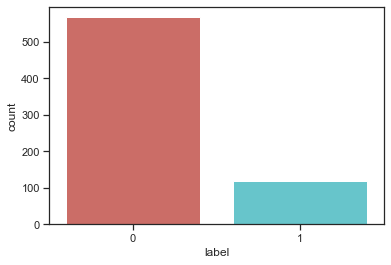

In [112]:
import seaborn as sb  
%matplotlib inline  
sb_label = sb.countplot(x='label', data = users, palette = 'hls')
sb_label
sb_label.figure.savefig("label.png")

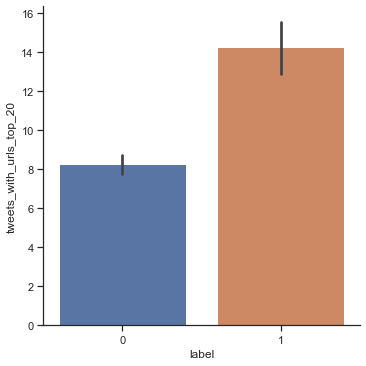

In [113]:
sb_to20 = sb.catplot(y='tweets_with_urls_top_20', x= 'label', kind="bar" ,data = users)
sb_to20
sb_to20.savefig("top20.png")

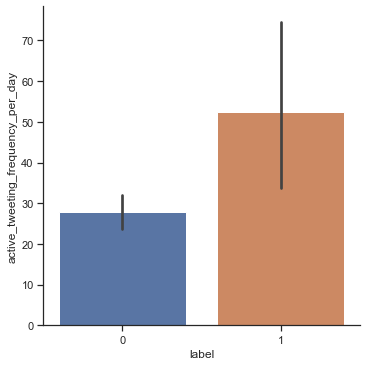

In [114]:
sb_to20 = sb.catplot(y='active_tweeting_frequency_per_day', x= 'label', kind="bar" ,data = users)
sb_to20
sb_to20.savefig("active_tweeting_frequency_per_day.png")

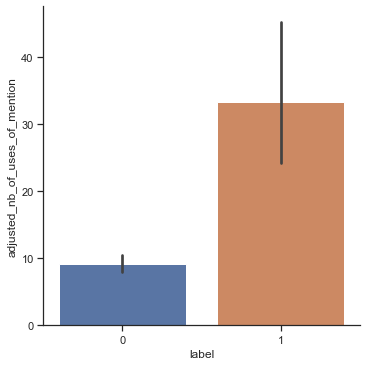

In [115]:
sb_to20 = sb.catplot(y='adjusted_nb_of_uses_of_mention', x= 'label', kind="bar" ,data = users)
sb_to20
sb_to20.savefig("adjusted_nb_of_uses_of_mention.png")

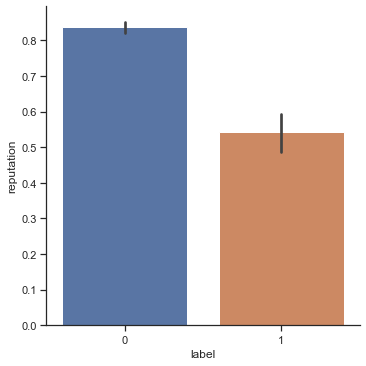

In [116]:
sb_to20 = sb.catplot(y='reputation', x= 'label', kind="bar" ,data = users)
sb_to20
sb_to20.savefig("reputation.png")

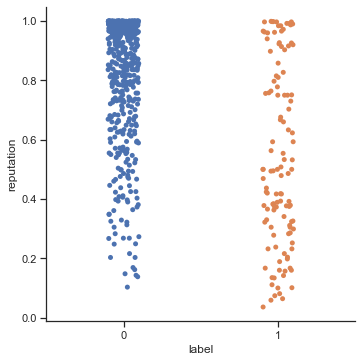

In [117]:
sb.set_theme(style="ticks")
#label = sb.load_dataset("exercise")
g = sb.catplot(y="reputation", x="label", data=users)
g

In [143]:
float_columns = []
int_columns = []
boolean_columns = []
else_columns = []
object_columns = []
for i in columns :
    #print (users[i].head(5))
    if users[i].dtype == 'float64':
        float_columns.append(i)
        #print (users[i].dtype)
    if users[i].dtype == 'int64':
        int_columns.append(i)
        #print (users[i].dtype)
    if users[i].dtype == 'bool':
        boolean_columns.append(i)
        #print (users[i].dtype)
    if users[i].dtype == 'object':
        object_columns.append(i)
        #print (users[i].dtype)
    else :
        else_columns.append(i)
        #print (users[i].dtype)

In [121]:
object_columns

['avg_intertweet_times',
 'date_newest_tweet',
 'date_oldest_tweet',
 'lang',
 'max_intertweet_times',
 'min_intertweet_times',
 'std_intertweet_times',
 'time_zone']

In [122]:
# all columns content float_values
#float_columns

In [123]:
# all columns content boolean values
boolean_columns

['default_profile', 'default_profile_image']

In [124]:
# all columns content int values
#int_columns

In [125]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()
#labelencoder.fit(users['Name'])

categorical_cols = boolean_columns + object_columns

# apply le on categorical feature columns
users[categorical_cols] = users[categorical_cols].apply(lambda col: labelencoder.fit_transform(col))
users[categorical_cols].head(10)

,default_profile,default_profile_image,avg_intertweet_times,date_newest_tweet,date_oldest_tweet,lang,max_intertweet_times,min_intertweet_times,std_intertweet_times,time_zone
0,0,0,663,659,657,0,428,8,667,35
1,0,0,125,138,662,4,366,2,228,63
2,1,0,662,16,87,4,644,7,673,59
3,1,0,465,50,230,0,676,0,547,59
4,1,0,64,148,83,4,19,0,26,25
5,0,0,9,17,47,4,10,0,10,59
6,0,0,482,39,152,0,134,55,372,63
7,1,0,297,678,604,4,557,0,582,29
8,1,0,641,68,16,4,664,2,658,29
9,0,0,314,206,437,4,657,0,507,63


In [126]:
users.head(10)

,active_tweeting_frequency_per_day,adjusted_nb_of_uses_of_hashtag,adjusted_nb_of_uses_of_mention,adjusted_nb_of_uses_of_sources,adjusted_nb_of_uses_of_url,age,avg_intertweet_times,avg_intertweet_times_seconds,content_duration_days,date_newest_tweet,...,time_zone,tweeting_frequency_per_day,tweets_with_at_top_20,tweets_with_hashtags_top_20,tweets_with_urls_top_20,urls_used_on_average,user_id,utc_offset,coded_id,label
0,0.055,2.600,5.308,21.087,2.333,2186,663,1660357.0,422,659,...,35,5.396,10,5,5,2.000,494199648,-36000.0,203,0
1,40.000,9.938,8.329,400.000,1.000,2474,125,2361.0,10,138,...,63,35.167,19,2,1,1.000,293270197,10800.0,138,0
2,0.334,2.600,2.412,55.284,36.885,3220,662,1440271.0,485,16,...,59,0.051,0,0,20,2.400,33046208,-28800.0,148,1
3,4.494,0.000,0.000,203.380,1.000,816,465,19449.0,89,50,...,59,23.863,0,0,20,1.000,4217668515,-28800.0,182,1
4,80.000,395.000,0.000,400.000,174.673,1174,64,1200.0,5,148,...,25,46.056,0,19,20,1.908,2909542704,-21600.0,135,1
5,400.000,88.713,0.000,400.000,1.344,2002,9,299.0,1,17,...,59,395.738,0,16,20,1.027,767090622,-28800.0,243,1
6,3.000,0.000,1.000,3.000,0.000,1950,482,22343.0,1,39,...,63,2.839,3,0,0,0.000,871372070,10800.0,258,0
7,12.903,28.119,0.000,400.000,1.172,890,297,6812.0,31,678,...,29,445.565,0,16,20,1.031,3458288593,-14400.0,161,1
8,0.691,6.251,18.173,347.061,27.340,1432,641,125425.0,802,68,...,29,4.410,14,5,7,2.541,2384230429,-14400.0,79,0
9,11.735,3.017,6.249,399.000,1.529,2532,314,7522.0,34,206,...,63,34.954,18,5,3,1.130,262471495,10800.0,107,0


In [127]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686 entries, 0 to 685
Columns: 146 entries, active_tweeting_frequency_per_day to label
dtypes: float64(92), int32(8), int64(46)
memory usage: 786.4 KB


In [128]:
# features
X = users.iloc[:,0:145]
X

,active_tweeting_frequency_per_day,adjusted_nb_of_uses_of_hashtag,adjusted_nb_of_uses_of_mention,adjusted_nb_of_uses_of_sources,adjusted_nb_of_uses_of_url,age,avg_intertweet_times,avg_intertweet_times_seconds,content_duration_days,date_newest_tweet,...,time_since_newest_tweet_months,time_zone,tweeting_frequency_per_day,tweets_with_at_top_20,tweets_with_hashtags_top_20,tweets_with_urls_top_20,urls_used_on_average,user_id,utc_offset,coded_id
0,0.055,2.600,5.308,21.087,2.333,2186,663,1660357.0,422,659,...,1.533333,35,5.396,10,5,5,2.000,494199648,-36000.0,203
1,40.000,9.938,8.329,400.000,1.000,2474,125,2361.0,10,138,...,0.000000,63,35.167,19,2,1,1.000,293270197,10800.0,138
2,0.334,2.600,2.412,55.284,36.885,3220,662,1440271.0,485,16,...,80.466667,59,0.051,0,0,20,2.400,33046208,-28800.0,148
3,4.494,0.000,0.000,203.380,1.000,816,465,19449.0,89,50,...,0.033333,59,23.863,0,0,20,1.000,4217668515,-28800.0,182
4,80.000,395.000,0.000,400.000,174.673,1174,64,1200.0,5,148,...,0.000000,25,46.056,0,19,20,1.908,2909542704,-21600.0,135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,0.995,1.000,2.256,163.250,1.013,2738,610,87585.0,201,447,...,0.066667,67,1.440,6,0,15,1.006,138282579,32400.0,747
682,100.000,42.436,35.122,98.490,1.000,3405,41,896.0,2,463,...,0.066667,29,23.174,20,19,1,1.000,15290441,-14400.0,541
683,2.020,0.000,0.000,136.000,1.000,2249,557,43014.0,99,473,...,0.066667,72,2.512,0,0,11,1.000,365303324,32400.0,474
684,1.418,1.912,5.804,147.610,1.077,3137,585,61605.0,141,235,...,0.100000,48,7.198,19,8,6,1.040,26738483,3600.0,435


In [129]:
# label
Y = users.iloc[:,145]
Y

0      0
1      0
2      1
3      1
4      1
      ..
681    0
682    0
683    0
684    0
685    0
Name: label, Length: 686, dtype: int64

In [130]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, \
    accuracy_score, f1_score

def evaluation(Y_test,Y_predict):
   print(' Accuracy:', round(accuracy_score(Y_test, Y_predict),4)*100,"%")
   print(' Recall:', round(recall_score(Y_test, Y_predict),2)*100,"%")
   print(' Precision:', round(precision_score(Y_test,Y_predict ),4)*100,"%")
   print(' F1 score:', round(f1_score(Y_test, Y_predict),4)*100,"%")

In [136]:
from sklearn.naive_bayes import  MultinomialNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split

#DecisionTree
clfDecisionTreeClassifier=DecisionTreeClassifier()
modelDecisionTreeClassifier=clfDecisionTreeClassifier.fit(X_train,Y_train)
Y_predict=modelDecisionTreeClassifier.predict(X_test)
print("*******Classification avec DecisionTreeClassifier*******")
evaluation(Y_test,Y_predict)


*******Classification avec DecisionTreeClassifier*******
 Accuracy: 97.1 %
 Recall: 92.0 %
 Precision: 91.67 %
 F1 score: 91.67 %


In [137]:
from sklearn.model_selection import StratifiedKFold,GroupKFold, cross_val_score

cv = StratifiedKFold(5)
cross_val_score(DecisionTreeClassifier(),X,Y,cv=cv)


array([0.52173913, 0.97080292, 0.96350365, 0.97080292, 0.94890511])

In [138]:
cross_val_score(KNeighborsClassifier(),X,Y,cv=cv)

array([0.7826087 , 0.87591241, 0.83211679, 0.8540146 , 0.82481752])

In [139]:
cross_val_score(LogisticRegression(),X,Y,cv=cv)

array([0.82608696, 0.16788321, 0.16788321, 0.82481752, 0.17518248])

In [140]:
cross_val_score(BernoulliNB(),X,Y,cv=cv)

array([0.8115942 , 0.87591241, 0.91240876, 0.86861314, 0.90510949])

In [141]:
cross_val_score(LinearSVC(),X,Y,cv=cv)

c:\program files\python36\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
c:\program files\python36\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

array([0.82608696, 0.81021898, 0.83211679, 0.82481752, 0.82481752])

In [144]:
##############
cv = GroupKFold(5).get_n_splits(X,Y,groups=144)
cross_val_score(DecisionTreeClassifier(),X,Y,cv=cv)

array([0.52173913, 0.95620438, 0.97810219, 0.96350365, 0.94890511])

In [ ]:
# Test Submission File

In [149]:
users_test = users.drop(['label'], axis=1)
users_test

,active_tweeting_frequency_per_day,adjusted_nb_of_uses_of_hashtag,adjusted_nb_of_uses_of_mention,adjusted_nb_of_uses_of_sources,adjusted_nb_of_uses_of_url,age,avg_intertweet_times,avg_intertweet_times_seconds,content_duration_days,date_newest_tweet,...,time_since_newest_tweet_months,time_zone,tweeting_frequency_per_day,tweets_with_at_top_20,tweets_with_hashtags_top_20,tweets_with_urls_top_20,urls_used_on_average,user_id,utc_offset,coded_id
0,0.055,2.600,5.308,21.087,2.333,2186,663,1660357.0,422,659,...,1.533333,35,5.396,10,5,5,2.000,494199648,-36000.0,203
1,40.000,9.938,8.329,400.000,1.000,2474,125,2361.0,10,138,...,0.000000,63,35.167,19,2,1,1.000,293270197,10800.0,138
2,0.334,2.600,2.412,55.284,36.885,3220,662,1440271.0,485,16,...,80.466667,59,0.051,0,0,20,2.400,33046208,-28800.0,148
3,4.494,0.000,0.000,203.380,1.000,816,465,19449.0,89,50,...,0.033333,59,23.863,0,0,20,1.000,4217668515,-28800.0,182
4,80.000,395.000,0.000,400.000,174.673,1174,64,1200.0,5,148,...,0.000000,25,46.056,0,19,20,1.908,2909542704,-21600.0,135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,0.995,1.000,2.256,163.250,1.013,2738,610,87585.0,201,447,...,0.066667,67,1.440,6,0,15,1.006,138282579,32400.0,747
682,100.000,42.436,35.122,98.490,1.000,3405,41,896.0,2,463,...,0.066667,29,23.174,20,19,1,1.000,15290441,-14400.0,541
683,2.020,0.000,0.000,136.000,1.000,2249,557,43014.0,99,473,...,0.066667,72,2.512,0,0,11,1.000,365303324,32400.0,474
684,1.418,1.912,5.804,147.610,1.077,3137,585,61605.0,141,235,...,0.100000,48,7.198,19,8,6,1.040,26738483,3600.0,435


In [154]:
test_submission

,coded_id,label
0,5,NaN
1,26,NaN
2,37,NaN
3,40,NaN
4,52,NaN
...,...,...
76,729,NaN
77,745,NaN
78,746,NaN
79,757,NaN


In [155]:
code_ids_label

,coded_id,user_id
0,1,100338945
1,2,1084425186
2,3,1110273865
3,4,1132049448
4,5,1145742354
...,...,...
762,763,71337202
763,764,1886085126
764,765,117230308
765,766,1434337280


In [156]:
labels_test = pd.merge(test_submission, code_ids_label, on='coded_id')
labels_test

,coded_id,label,user_id
0,5,NaN,1145742354
1,26,NaN,1555076659
2,37,NaN,1732102699
3,40,NaN,1873016161
4,52,NaN,2286370481
...,...,...,...
76,729,NaN,6312312
77,745,NaN,18493702
78,746,NaN,121598378
79,757,NaN,459998804


In [157]:
features_labels_test = pd.merge(labels_test, users_test, on='user_id')
features_labels_test

,coded_id_x,label,user_id,active_tweeting_frequency_per_day,adjusted_nb_of_uses_of_hashtag,adjusted_nb_of_uses_of_mention,adjusted_nb_of_uses_of_sources,adjusted_nb_of_uses_of_url,age,avg_intertweet_times,...,time_since_newest_tweet_days,time_since_newest_tweet_months,time_zone,tweeting_frequency_per_day,tweets_with_at_top_20,tweets_with_hashtags_top_20,tweets_with_urls_top_20,urls_used_on_average,utc_offset,coded_id_y


In [162]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686 entries, 0 to 685
Columns: 146 entries, active_tweeting_frequency_per_day to label
dtypes: float64(92), int32(8), int64(46)
memory usage: 786.4 KB


# Dimention reduction

In [173]:
# PCA Scikit-Learn API
users

,active_tweeting_frequency_per_day,adjusted_nb_of_uses_of_hashtag,adjusted_nb_of_uses_of_mention,adjusted_nb_of_uses_of_sources,adjusted_nb_of_uses_of_url,age,avg_intertweet_times,avg_intertweet_times_seconds,content_duration_days,date_newest_tweet,...,time_zone,tweeting_frequency_per_day,tweets_with_at_top_20,tweets_with_hashtags_top_20,tweets_with_urls_top_20,urls_used_on_average,user_id,utc_offset,coded_id,label
0,0.055,2.600,5.308,21.087,2.333,2186,663,1660357.0,422,659,...,35,5.396,10,5,5,2.000,494199648,-36000.0,203,0
1,40.000,9.938,8.329,400.000,1.000,2474,125,2361.0,10,138,...,63,35.167,19,2,1,1.000,293270197,10800.0,138,0
2,0.334,2.600,2.412,55.284,36.885,3220,662,1440271.0,485,16,...,59,0.051,0,0,20,2.400,33046208,-28800.0,148,1
3,4.494,0.000,0.000,203.380,1.000,816,465,19449.0,89,50,...,59,23.863,0,0,20,1.000,4217668515,-28800.0,182,1
4,80.000,395.000,0.000,400.000,174.673,1174,64,1200.0,5,148,...,25,46.056,0,19,20,1.908,2909542704,-21600.0,135,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,0.995,1.000,2.256,163.250,1.013,2738,610,87585.0,201,447,...,67,1.440,6,0,15,1.006,138282579,32400.0,747,0
682,100.000,42.436,35.122,98.490,1.000,3405,41,896.0,2,463,...,29,23.174,20,19,1,1.000,15290441,-14400.0,541,0
683,2.020,0.000,0.000,136.000,1.000,2249,557,43014.0,99,473,...,72,2.512,0,0,11,1.000,365303324,32400.0,474,0
684,1.418,1.912,5.804,147.610,1.077,3137,585,61605.0,141,235,...,48,7.198,19,8,6,1.040,26738483,3600.0,435,0


In [169]:
from sklearn.decomposition import PCA
data = users
# define transform
pca = PCA()
# prepare transform on dataset
pca.fit(data)
# apply transform to dataset
transformed = pca.transform(data)
transformed

array([[-2.95017689e+16,  1.29321727e+07, -1.63199223e+05, ...,
        -1.31662553e+01, -3.39515630e+01,  9.08329110e+00],
       [-2.95017691e+16, -2.45074349e+06, -2.18373226e+05, ...,
         2.46200757e+00,  4.00442652e+00,  9.08727703e-02],
       [-2.95017694e+16,  5.58327411e+07,  4.38175284e+04, ...,
         1.14585304e+01, -3.17132014e+00,  5.33667325e+00],
       ...,
       [-2.95017690e+16, -2.43077555e+06, -2.11408343e+05, ...,
        -4.38835450e+00,  1.27868842e+01, -7.17158695e+00],
       [-2.95017694e+16, -9.45795401e+05, -1.48951001e+05, ...,
         1.16243196e+00,  2.71911688e+00, -8.61559942e-01],
       [-2.95017679e+16, -2.35717353e+06, -1.95973187e+05, ...,
        -2.07174414e+01, -5.85336213e+00,  1.33856366e+00]])

In [172]:
transformed.shape

(686, 146)

In [179]:
X = users.iloc[:,0:145]
Y = users.iloc[:,145:146]
Y

,label
0,0
1,0
2,1
3,1
4,1
...,...
681,0
682,0
683,0
684,0


>1 0.831 (0.020)
>2 0.831 (0.020)
>3 0.831 (0.020)
>4 0.831 (0.020)
>5 0.831 (0.020)
>6 0.831 (0.020)
>7 0.831 (0.020)
>8 0.831 (0.020)
>9 0.831 (0.020)
>10 0.831 (0.020)
>11 0.831 (0.020)
>12 0.831 (0.020)
>13 0.831 (0.020)
>14 0.831 (0.020)
>15 0.831 (0.020)
>16 0.831 (0.020)
>17 0.831 (0.020)
>18 0.831 (0.020)
>19 0.831 (0.020)
>20 0.831 (0.020)
>21 0.831 (0.020)
>22 0.831 (0.020)
>23 0.831 (0.020)
>24 0.831 (0.020)
>25 0.831 (0.020)
>26 0.831 (0.020)
>27 0.831 (0.020)
>28 0.831 (0.020)
>29 0.831 (0.020)
>30 0.831 (0.020)
>31 0.831 (0.020)
>32 0.831 (0.020)
>33 0.831 (0.020)
>34 0.831 (0.020)
>35 0.831 (0.020)
>36 0.831 (0.020)
>37 0.831 (0.020)
>38 0.831 (0.020)
>39 0.831 (0.020)
>40 0.831 (0.020)
>41 0.831 (0.020)
>42 0.831 (0.020)
>43 0.831 (0.020)
>44 0.831 (0.020)
>45 0.831 (0.020)
>46 0.831 (0.020)
>47 0.831 (0.020)
>48 0.831 (0.020)
>49 0.831 (0.020)
>50 0.831 (0.020)
>51 0.831 (0.020)
>52 0.831 (0.020)
>53 0.831 (0.020)
>54 0.831 (0.020)
>55 0.831 (0.020)
>56 0.831 (0.020)
>

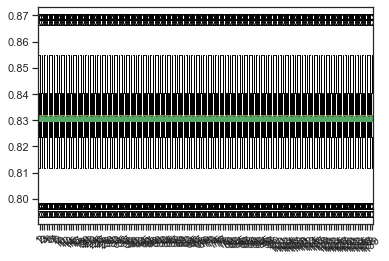

In [187]:

# compare pca number of components with logistic regression algorithm for classification
from numpy import mean
from numpy import std
#from sklearn.datasets import make_classification
#from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
#from sklearn.linear_model import LogisticRegression
#from matplotlib import pyplot

# get the dataset
#def get_dataset():
 #   X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
  #  return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,140):
        steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, Y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=45)
plt.show()





>1 0.838 (0.032)
>2 0.840 (0.040)
>3 0.882 (0.038)
>4 0.878 (0.040)
>5 0.903 (0.040)
>6 0.907 (0.028)
>7 0.907 (0.034)
>8 0.901 (0.029)
>9 0.901 (0.026)
>10 0.896 (0.025)
>11 0.902 (0.031)
>12 0.900 (0.035)
>13 0.902 (0.027)
>14 0.906 (0.027)
>15 0.902 (0.031)
>16 0.899 (0.031)
>17 0.899 (0.035)
>18 0.903 (0.027)
>19 0.902 (0.030)
>20 0.909 (0.034)


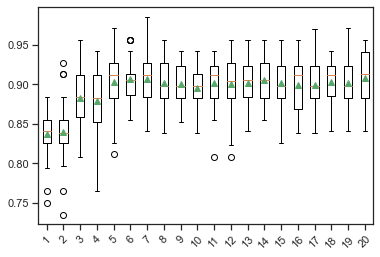

In [186]:

# compare pca number of components with logistic regression algorithm for classification
from numpy import mean
from numpy import std
#from sklearn.datasets import make_classification
#from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
#from sklearn.linear_model import LogisticRegression
#from matplotlib import pyplot

# get the dataset
#def get_dataset():
 #   X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
  #  return X, y

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(1,21):
        steps = [('pca', PCA(n_components=i)), ('m', DecisionTreeClassifier())]
        models[str(i)] = Pipeline(steps=steps)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, Y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.xticks(rotation=45)
plt.show()





In [ ]:
# 
VarianceThreshold(threshold=(.8 * (1 - .8)))

## Feature Selection

## Data Analysis part

##  Models

## Evaluation of models